# **Objective: Implementing a Linear Regressor on the California Housing Dataset.**

### **Overview of the Dataset**

In [161]:
# importing dependencies

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as sc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [212]:
# loading data

db = fetch_california_housing(as_frame = True)
db.data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
print(db.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [213]:
# creating a dataframe with both target and variables

df = db.data
df["target"] = db.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
# exploring the nature of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [19]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


##**EDA**#

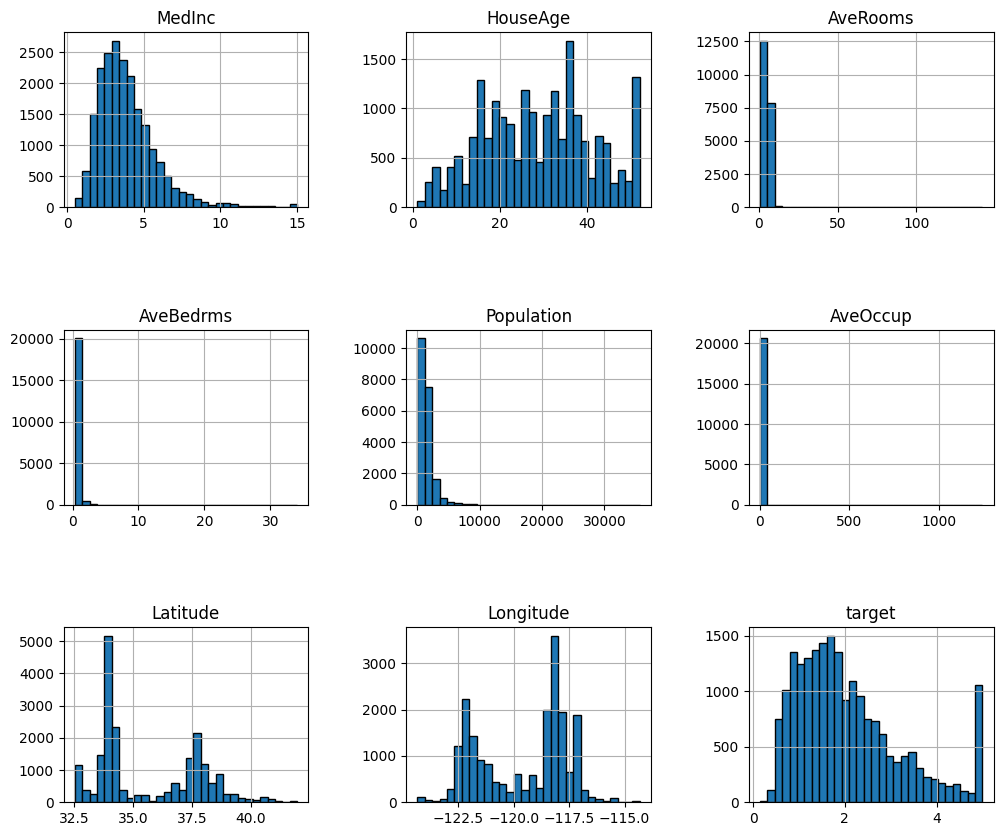

In [227]:
# plotting the skewness within features

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

######**Right skewness observed: 'MedInc', 'Population', 'AveOccup', 'AveBedrms', 'AveRooms'**

<Axes: >

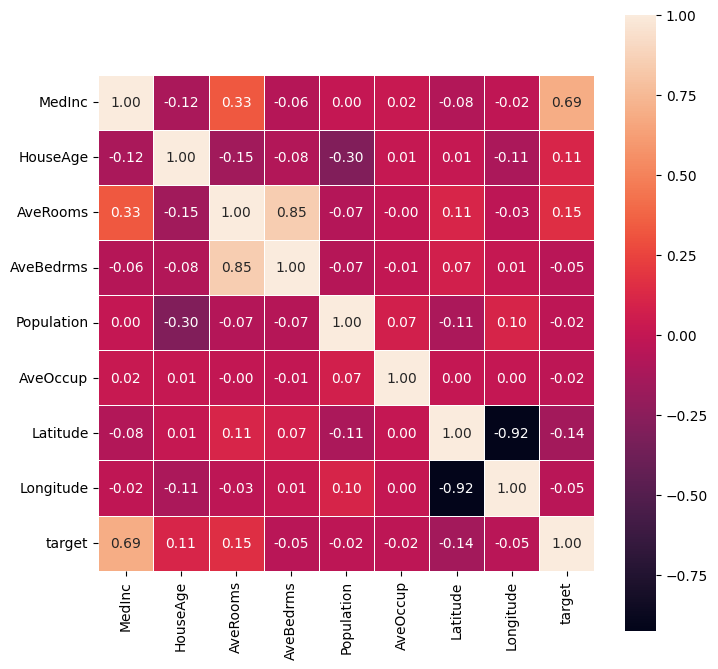

In [40]:
# understanding collinearity

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=0.5, square=True)

######**High collinearity between 'AveRooms' & 'AveBedrms'**

In [204]:
# dropping the column 'AveBedrms'/'AveOccup' based on the heatmap

# df = df.drop(columns=["AveOccup"])
# df.shape

(20640, 8)

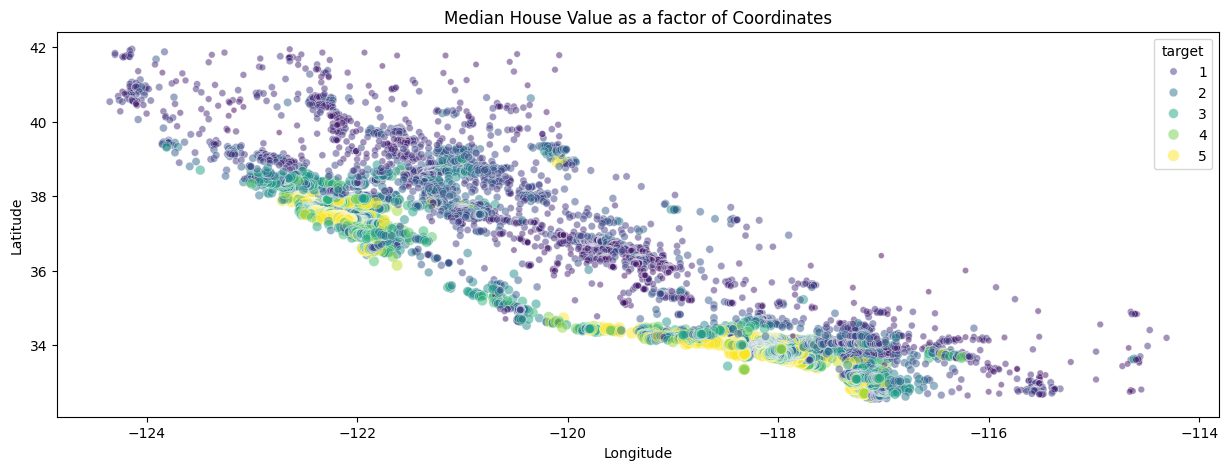

In [265]:
# bivariate analysis for coordinates

plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='target', size='target', palette="viridis", alpha=0.5)
plt.title("Median House Value as a factor of Coordinates")
plt.show()

###### **Coordinates impact the median housing value depending on the spatial location**

###**Model Building**

In [216]:
# splitting the data

x = df.drop(columns="target")
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=122)

In [217]:
# Scaling the features

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [218]:
# training linear regressor

model = LinearRegression()
model.fit(x_train, y_train)

# predicting output for test dataset

y_pred = model.predict(x_test)

# printing the co-efficient(s) and bias

w = model.coef_
b = model.intercept_

print("Coefficients:", w)
print("Bias:", b)

Coefficients: [ 0.8437505   0.12280009 -0.29162041  0.33688989 -0.00193617 -0.04086774
 -0.90390435 -0.87438383]
Bias: 2.0703500944767472


In [222]:
# calculating r2_score and error metrics

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

R2 Score:  0.6316226883700362
Mean Squared Error:  0.471303417783096


# **Result**
###### R2 Score:  0.6316226883700362
###### Mean Squared Error:  0.471303417783096

### **For a test size of 0.2, the best fit was achieved when:**
##### *a. none of the features were dropped*
##### *b. data was split with a random state of 122*
##### *c. features were scaled upon splitting*

#### **Treating the outliers for highly skewed features may improve the result further.**

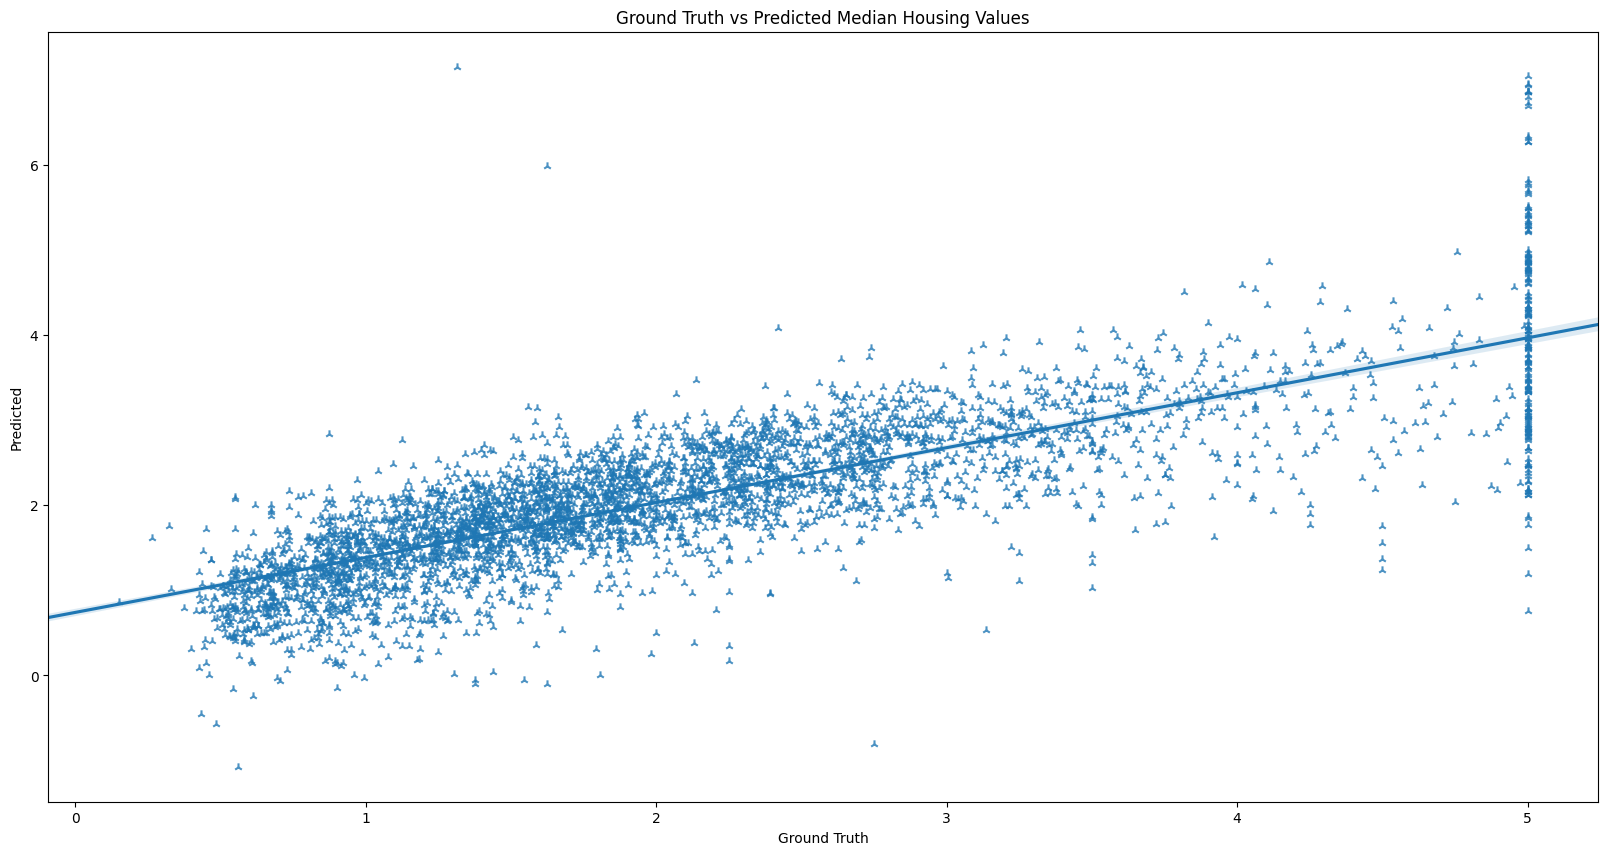

In [262]:
# comparing predicted and actual values

plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y=y_pred, truncate=False, marker="2")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted")
plt.title("Ground Truth vs Predicted Median Housing Values")
plt.show()

In [215]:
'''
l = 0
m = 10
for rs in range(0,500):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  if mse < m:
    m = mse
    l = rs

print("Least mse: ", m)
print("Best Random State: ", l)
'''

Least mse:  0.471303417783096
Best Random State:  122
